Classificação
=============



## Introdução



Até agora estudamos estratégias de aprendizado de máquina supervisionado onde o target era numérico. Nestes problemas, os modelos preditivos foram induzidos por algoritmos de regressão que tinham como objetivo minimizar uma certa função de perda (também conhecida como função de risco ou função de custo). A função de perda que utilizamos até agora foi o RMSE.

Quando nosso target é categórico, não é mais apropriado utilizar algoritmos de regressão e também não é mais apropriado utilizar a função de perda RMSE. Precisamos de outras estratégias!



## O problema da classificação binária



Suponha que você tenha um target categórico binário, isto é, ele pode assumir apenas dois valores (verdadeiro ou falso, zero ou um, sim ou não, etc&#x2026;). Suponha também que você tenha um modelo capaz de prever seu target.

Neste caso, temos os valores que chamaremos de **reais** que são os valores medidos (isto é, os dados do nosso conjunto de dados) e os valores **preditos** que são os valores previstos pelo modelo.

Com isso, podemos dividir o resultado em 4 caixas:

-   **VP**: Verdadeiro positivo (*true positive*): rótulo real é 1 e a previsão foi 1.
-   **FP**: Falso positivo (*false positive*): rótulo real é 0 e a previsão foi 1.
-   **VN**: Verdadeiro negativo (*true negative*): rótulo real é 0 e a previsão foi 0.
-   **FN**: Falso negativo (*false negative*): rótulo real é 1 e a previsão foi 0.

Estes valores costumam ser representados no que é conhecido como **matriz de confusão**.

| |Valor predito = 1|Valor predito = 0|
|---|---|---|
| <b>Valor real = 1</b>|VP|FN|
| <b>Valor real = 0</b>|FP|VN|

Antes de seguir em frente é importante observar que existem dois tipos de erros possíveis neste caso binário:

-   **Erro tipo 1**: quando se atribui o rótulo positivo mas o valor real é negativo (falso positivo)

-   **Erro tipo 2**: quando se atribui o rótulo negativo mas o valor real é positivo (falso negativo)

Uma forma didática para visualizar os dois tipos de erros é a imagem abaixo. Nesta imagem, assuma que o rótulo 0 significa &ldquo;não está grávida&rdquo; e o rótulo 1 significa &ldquo;está grávida&rdquo;.

![img](https://i.stack.imgur.com/Kq0OH.jpg)

Na imagem, &ldquo;You&rsquo;re pregnant&rdquo; significa &ldquo;você está grávida&rdquo; e &ldquo;You&rsquo;re not pregnant&rdquo; significa &ldquo;você não está grávida&rdquo;.



## Métricas



Com base na matriz de confusão, podemos definir diversas métricas para problemas de classificação.

**Nota**: todas as métricas apresentadas abaixo seguem a mesma regra de &ldquo;quanto maior, melhor&rdquo;.



### Taxa de verdadeiros positivos



$$
\mathrm{TPR = \frac{VP}{VP + FN}}
$$

**O que mede**: quantos exemplos com rótulo 1 (positivo) foram corretamente identificados.

**Outros nomes**:

-   Sensibilidade
-   Taxa de acerto
-   *Sensitivity*
-   *Recall*
-   *True positive rate* (TPR)



### Taxa de verdadeiros negativos



$$
\mathrm{TNR = \frac{VN}{VN + FP}}
$$

**O que mede**: quantos exemplos com rótulo 0 (negativo) foram corretamente identificados.

**Outros nomes**:

-   Especificidade
-   *Specificity*
-   *Selectivity*
-   *True negative rate* (TNR)



### Valor predito positivo



$$
\mathrm{PPV = \frac{VP}{VP + FP}}
$$

**O que mede**: dos exemplos classificados com o rótulo 1 (positivo), quantos foram corretamente identificados.

**Outros nomes**:

-   Precisão
-   *Precision*
-   *Positive predicted value* (PPV)



### Valor predito negativo



$$
\mathrm{NPV = \frac{VN}{VN + FN}}
$$

**O que mede**: dos exemplos classificados com o rótulo 0 (negativo), quantos foram corretamente identificados.

**Outros nomes**:

-   *Negative predicted value* (NPV)



### Acurácia



$$
\mathrm{ACC = \frac{VP + VN}{VP + FP + VN + FN}}
$$

**O que mede**: fração dos exemplos que foram corretamente identificados.

**Outros nomes**:

-   *Accuracy* (ACC)



### Estatística F1



$$
\mathrm{F1 = \frac{2}{\frac{1}{TPR} + \frac{1}{PPV}} = \frac{2VP}{2VP + FP + FN}}
$$

**O que mede**: média harmônica entre TPR (sensibilidade) e PPV (precisão).

**Outros nomes**:

-   F1 score
-   F-score
-   F-measure



### Outras métricas



Veja a referência [2].



## Modelos de classificação binária com `scikit-learn`



### Carregando os dados



Pra variar um pouco, vamos utilizar o conjunto de dados de pinguins 🙂.



In [13]:
import seaborn as sns

DATASET_NAME = "penguins"
FEATURES = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
TARGET = ["species"]

df = sns.load_dataset(DATASET_NAME)

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna()

Observe que temos três espécies de pinguins neste conjunto de dados, logo não seria uma classificação binária&#x2026;



In [14]:
print(df["species"].unique())

['Adelie' 'Chinstrap' 'Gentoo']


Um dos pinguins deverá nos deixar&#x2026; por votação do Comitê de Escolha de Pinguins (CEP), os pinguins de barbicha foram selecionados para nos deixar.



In [15]:
ELIMINADOS = "Chinstrap"

logic = df["species"] != ELIMINADOS
df = df.loc[logic]

Para diversos algoritmos do `scikit-learn`, **não** é necessário binarizar nosso target. No entanto, vamos fazer isso para ver como funciona. O `scikit-learn` já tem um binarizador pronto.



In [16]:
from sklearn.preprocessing import LabelBinarizer

binarizador = LabelBinarizer()
binarizador.fit(df[TARGET])

nomes_das_features = binarizador.classes_

df[TARGET] = binarizador.transform(df[TARGET])
df

print(nomes_das_features)

['Adelie' 'Gentoo']


Finalmente, separamos os dados em treino e teste.



In [17]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

indices = df.index
indices_treino, indices_teste = train_test_split(indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

### Baseline



O modelo baseline mais simples de classificação é o modelo que sempre prevê o dado mais frequente que observou durante o treino.



In [18]:
from sklearn.dummy import DummyClassifier

modelo_baseline = DummyClassifier()

modelo_baseline.fit(X_treino, y_treino)

DummyClassifier()

Vamos ver a matriz de confusão.



<AxesSubplot: >

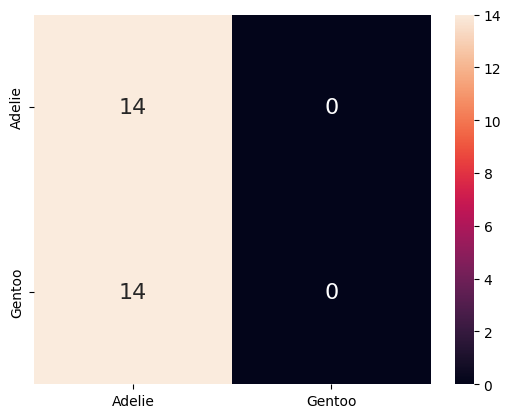

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Vamos ver as métricas.



In [20]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       0.50      1.00      0.67        14
      Gentoo       0.00      0.00      0.00        14

    accuracy                           0.50        28
   macro avg       0.25      0.50      0.33        28
weighted avg       0.25      0.50      0.33        28



c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### $k$ vizinhos mais próximos



O modelo de $k$​-NN para classificação é muito similar ao de regressão. A diferença está após os $k$ vizinhos serem identificados: neste momento, ao invés de retornar a média dos valores dos vizinhos, o modelo retorna a *moda* destes valores. Por conta disso, é recomendado utilizar um valor ímpar para $k$ em problemas de classificação binária.

Vamos treinar um classificador $k$​-NN e observar a matriz de confusão.



['Adelie' 'Gentoo']


<AxesSubplot: >

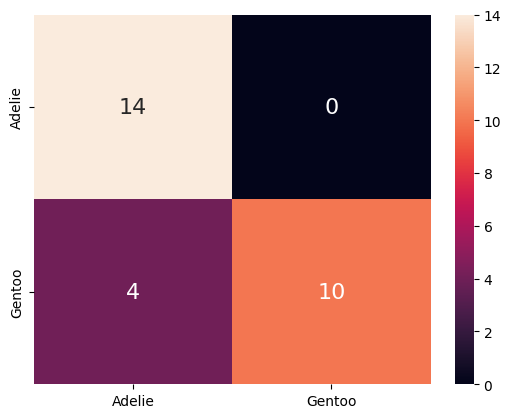

In [21]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()

modelo_knn.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)

print(nomes_das_features)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Vamos ver as métricas.



In [10]:
print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       0.78      1.00      0.88        14
      Gentoo       1.00      0.71      0.83        14

    accuracy                           0.86        28
   macro avg       0.89      0.86      0.85        28
weighted avg       0.89      0.86      0.85        28



### Regressão logística



Apesar do nome sugerir o contrário, a regressão logística é um *classificador* linear. Na literatura, a regressão logística também é conhecida como regressão logit, classificação de máxima entropia (MaxEnt) ou classificador log-linear.

A regressão logística, após treinada, prevê a probabilidade do target $y_i$ ter o rótulo 1 dado um certo conjunto de atributos $X_i$ de tamanho $N$. Em notação matemática temos

$$
P(y_i=1 | X_i) = \frac{1}{1 + \exp(-(\sum_{n=1}^N x_n \beta_n + \beta_0))},
$$

onde $x_n$ é o atributo $n$ de $X_i$, $\beta_0$ é o parâmetro chamado de viés e $\beta_n$ são parâmetros de ajuste (um para cada atributo de $X_i$).

A expressão matemática acima é a curva logística, ela varia de 0 a 1 com um formato de &ldquo;S&rdquo;. Veja um gráfico [aqui](https://en.wikipedia.org/wiki/Logistic_regression).

Cada previsão de um modelo logístico é justamente a probabilidade $P$ de que seu exemplo apresente o rótulo 1. Em geral, se $P > 0.5$ então atribuímos o rótulo 1 para o exemplo, do contrário atribuímos o rótulo 0. O valor de $P$ carrega consigo a confiança da previsão.

Vamos treinar um classificador usando uma regressão logística e observar a matriz de confusão.



<Axes: >

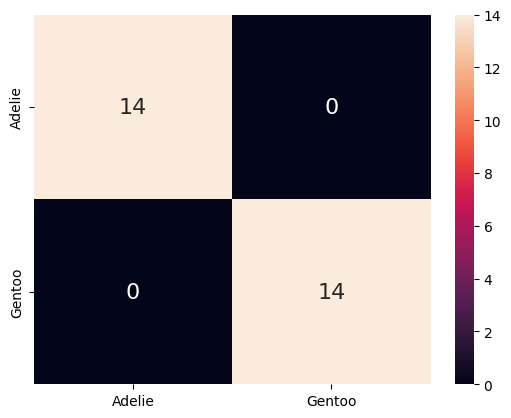

In [11]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression()

modelo_lr.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_lr.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Vamos ver as métricas.



In [12]:
print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



Vamos ver a probabilidade atribuída para cada previsão.



In [13]:
probabilidades = modelo_lr.predict_proba(X_teste)

for yp, yv, prob_ in zip(y_previsao, y_verdadeiro, probabilidades):
    nome_v = nomes_das_features[yv]
    nome_p = nomes_das_features[yp]
    print(
        f"Era {nome_v} e previu {nome_p}. "
        f"Prob. de ser {nome_p}: {prob_[yp]:.3f}."
    )

Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 0.999.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 0.990.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 0.992.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 0.994.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 0.996.
Era Adelie e previu Adelie. Prob. de ser Adelie:

### Árvore de decisão



Uma árvore de decisão para classificação é bastante similar a uma árvore de decisão de regressão, porém os vértices folha agora contém rótulos ao invés de números.

Um outro diferencial é o algoritmo que decide o splitting de cada vértice da árvore. No caso das árvores de decisão regressoras, o splitting era decidido pelo condicional que mais reduzia a somatória do erro quadrático da divisão. Como o conceito de erro quadrático não se aplica para problemas de classificação, devemos utilizar outra estratégia neste caso.

A estratégia adotada para escolher o melhor splitting se baseia no conceito de *impureza*. Um vértice é considerado *puro* quando apenas exemplos de mesmo rótulo chegam até este vértice. Se uma mistura de rótulos diferentes chegam em um vértice, este tem um certo grau de impureza que pode ser computado. <u>O melhor splitting será aquele que resulta em uma divisão com *menor* impureza</u>.

Existem diversas maneiras de computar a impureza, uma delas é a *entropia*. A forma do cálculo é

$$
H(X) = - \sum_{x \in X} p(x) \log_2 (p(x)) = E[- \log_2 (p(x))]
$$

onde $H$ é a entropia, $X$ é o conjunto de todos os rótulos presentes no vértice sendo estudado, $p(x)$ é a probabilidade de escolher o rótulo $x$ ao sortear um item qualquer do vértice e $E$ é a função do valor esperado.

Observe que o valor de entropia vai de 0 (vértice puro) até 1 (vértice mais impuro possível).

Vamos ver um exemplo. Qual a entropia do splitting abaixo?

| |Vértice A|Vértice B|
|---|---|---|
| Rótulo 0|70|0|
| Rótulo 1|10|30|

Primeiro computamos a entropia do vértice A ($H(A)$) e depois a entropia do vértice B ($H(B)$).

$$
H(A) = - (p(0) \log_2(p(0)) + p(1) \log_2(p(1))) = - (70/80 \cdot \log_2(70/80) + 10/80 \cdot \log_2(10/80))
$$



In [14]:
from math import log2

p0 = 70/80
p1 = 10/80
HA = -(p0 * log2(p0) + p1 * log2(p1))

print(f"A entropia do vértice A é de {HA}")

A entropia do vértice A é de 0.5435644431995964


$$
H(B) = - (p(0) \log_2(p(0)) + p(1) \log_2(p(1))) = - (0/30 \cdot \log_2(0/30) + 30/30 \cdot \log_2(30/30))
$$



In [15]:
from math import log2

p0 = 0/30
p1 = 30/30
# HB = -(p0 * log2(p0) + p1 * log2(p1)) # dá erro se rodar, veja o texto
HB = 0

print(f"A entropia do vértice B é de {HB}")

A entropia do vértice B é de 0


Neste caso, como convenção tomamos que $0 \cdot \log_2(0)=0$, o que resulta em $H(B)=0$

Para calcular a entropia do split, precisamos computar a entropia ponderada considerando $H(A)$ e $H(B)$:

$$
\textrm{Entropia do split} = \frac{n_A}{n_A + n_B}H(A) +  \frac{n_B}{n_A + n_B}H(B)
$$

onde $n_A$ é o número total de exemplos no vértice A (neste caso é 70 + 10) e $n_B$ é o número total de exemplos no vértice B (neste caso é 0 + 30).



In [16]:
nA = 70 + 10
nB = 0 + 30

H_split = (nA / (nA + nB)) * HA + (nB / (nA + nB)) * HB

print(f"A entropia do split é de {H_split}")

A entropia do split é de 0.39531959505425196


Agora suponha que temos outro split para considerar. Qual devemos utilizar? O acima ou o abaixo?

| |Vértice A|Vértice B|
|---|---|---|
| Rótulo 0|60|15|
| Rótulo 1|20|15|



In [17]:
p0 = 60/80
p1 = 20/80
HA = -(p0 * log2(p0) + p1 * log2(p1))

print(f"A entropia do vértice A é de {HA}")

p0 = 15/30
p1 = 15/30
HB = -(p0 * log2(p0) + p1 * log2(p1))

print(f"A entropia do vértice B é de {HB}")

nA = 60 + 20
nB = 15 + 15

H_split = (nA / (nA + nB)) * HA + (nB / (nA + nB)) * HB

print(f"A entropia do split é de {H_split}")

A entropia do vértice A é de 0.8112781244591328
A entropia do vértice B é de 1.0
A entropia do split é de 0.8627477268793693


Observe que o primeiro split resultou em uma entropia de 0.39 e o segundo em uma entropia de 0.86. Logo, o primeiro split é o que mais reduz a impureza dos vértices e deve ser escolhido neste caso.

Vamos treinar um classificador usando uma árvore de decisão e observar a matriz de confusão.



<Axes: >

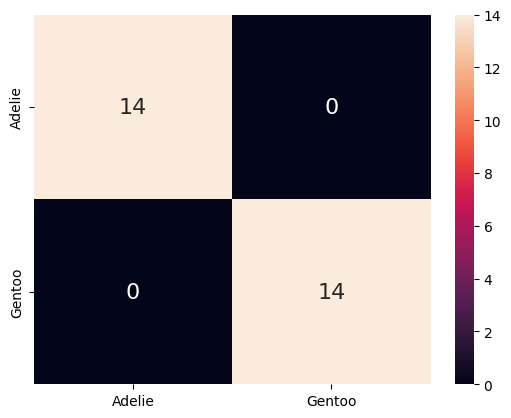

In [18]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier()

modelo_dt.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Vamos ver as métricas.



In [19]:
print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



Vamos ver a probabilidade atribuída para cada previsão. Neste caso, a probabilidade atribuída representa a fração de itens com o rótulo previsto no vértice folha que realizou a previsão.



In [20]:
probabilidades = modelo_dt.predict_proba(X_teste)

for yp, yv, prob_ in zip(y_previsao, y_verdadeiro, probabilidades):
    nome_v = nomes_das_features[yv]
    nome_p = nomes_das_features[yp]
    print(
        f"Era {nome_v} e previu {nome_p}. "
        f"Prob. de ser {nome_p}: {prob_[yp]:.3f}."
    )

Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie:

### Floresta aleatória



O classificador tipo floresta aleatória é muito similar ao regressor tipo floresta aleatória, com duas diferenças notáveis:

1.  As árvores da floresta são classificadores e não regressores (o que faz todo sentido!).

2.  A previsão final não é a média da previsão de cada árvore, mas sim a moda.

Vamos treinar um classificador usando uma floresta aleatória e observar a matriz de confusão.



<Axes: >

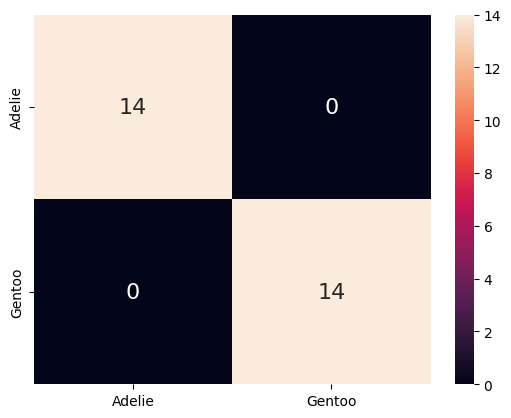

In [21]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier()

modelo_rf.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Vamos ver as métricas.



In [22]:
print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



Vamos ver a probabilidade atribuída para cada previsão. Neste caso, a probabilidade atribuída representa a fração de árvores dentro da floresta que previram o rótulo.



In [23]:
probabilidades = modelo_rf.predict_proba(X_teste)

for yp, yv, prob_ in zip(y_previsao, y_verdadeiro, probabilidades):
    nome_v = nomes_das_features[yv]
    nome_p = nomes_das_features[yp]
    print(
        f"Era {nome_v} e previu {nome_p}. "
        f"Prob. de ser {nome_p}: {prob_[yp]:.3f}."
    )

Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.980.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 0.980.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 0.970.
Era Adelie e previu Adelie. Prob. de ser Adelie:

## O problema da classificação multiclasse



Em certos problemas temos mais que duas classes no target (em termos matemáticos, o conjunto de todos os rótulos possíveis tem cardinalidade maior que 2). Por exemplo, o próprio dataset dos pinguins tinha *três* classes de pinguins (nós que removemos uma para transformá-lo em um problema binário). Chamamos estes problemas de *problemas de classificação multiclasse*.

Segundo a documentação (ref. [7]), todos os classificadores do `scikit-learn` são capazes de resolver problemas de classificação multiclasse.



## Modelos de classificação multiclasse com `scikit-learn`



### Carregando os dados



Vamos carregar os dados sem remover os pinguins de barbicha e sem binarizar o target.



In [24]:
DATASET_NAME = "penguins"
FEATURES = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
TARGET = ["species"]

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

df = sns.load_dataset(DATASET_NAME)

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna()

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

### Baseline



Matriz de confusão.



<Axes: >

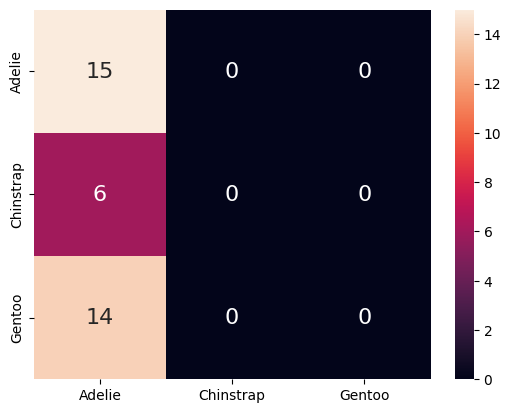

In [25]:
modelo_baseline = DummyClassifier()

modelo_baseline.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)

nomes_das_features = modelo_baseline.classes_
matriz_conf = confusion_matrix(
    y_verdadeiro, y_previsao, labels=nomes_das_features
)
df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)
sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Métricas.



In [26]:
print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       0.43      1.00      0.60        15
   Chinstrap       0.00      0.00      0.00         6
      Gentoo       0.00      0.00      0.00        14

    accuracy                           0.43        35
   macro avg       0.14      0.33      0.20        35
weighted avg       0.18      0.43      0.26        35



/home/daniel/data/Venv/ilumpy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/data/Venv/ilumpy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/data/Venv/ilumpy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### $k$ vizinhos mais próximos



Matriz de confusão.



<Axes: >

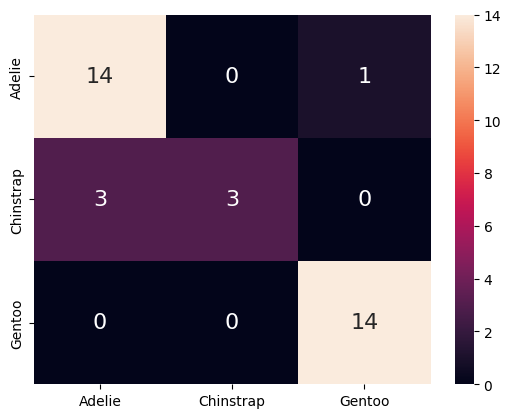

In [27]:
modelo_knn = KNeighborsClassifier()

modelo_knn.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

nomes_das_features = modelo_knn.classes_
matriz_conf = confusion_matrix(
    y_verdadeiro, y_previsao, labels=nomes_das_features
)
df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)
sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Métricas.



In [28]:
print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       0.82      0.93      0.87        15
   Chinstrap       1.00      0.50      0.67         6
      Gentoo       0.93      1.00      0.97        14

    accuracy                           0.89        35
   macro avg       0.92      0.81      0.84        35
weighted avg       0.90      0.89      0.88        35



### Regressão logística



Matriz de confusão.



/home/daniel/data/Venv/ilumpy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

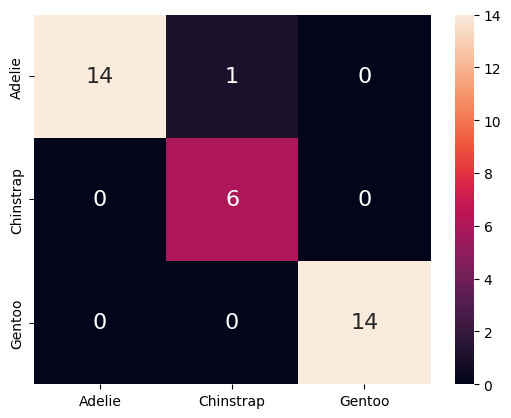

In [29]:
modelo_lr = LogisticRegression()

modelo_lr.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_lr.predict(X_teste)

nomes_das_features = modelo_lr.classes_
matriz_conf = confusion_matrix(
    y_verdadeiro, y_previsao, labels=nomes_das_features
)
df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)
sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Métricas.



In [30]:
print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        15
   Chinstrap       0.86      1.00      0.92         6
      Gentoo       1.00      1.00      1.00        14

    accuracy                           0.97        35
   macro avg       0.95      0.98      0.96        35
weighted avg       0.98      0.97      0.97        35



Probabilidade atribuída para cada previsão.



In [31]:
probabilidades = modelo_lr.predict_proba(X_teste)

for yp, yv, prob_ in zip(y_previsao, y_verdadeiro, probabilidades):
    indice = list(nomes_das_features).index(yp)
    print(f"Era {yv} e previu {yp}. Prob. de ser {yp}: {prob_[indice]:.3f}.")

Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 0.999.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.999.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 0.999.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 0.999.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.921.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Adelie e previu Chinstrap. Prob. de ser Chinstrap: 0.818.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.883.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.00

### Árvore de decisão



<Axes: >

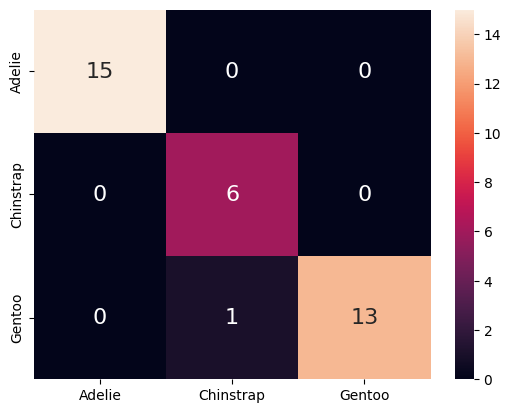

In [32]:
modelo_dt = DecisionTreeClassifier()

modelo_dt.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

nomes_das_features = modelo_dt.classes_
matriz_conf = confusion_matrix(
    y_verdadeiro, y_previsao, labels=nomes_das_features
)
df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)
sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Métricas.



In [33]:
print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       0.86      1.00      0.92         6
      Gentoo       1.00      0.93      0.96        14

    accuracy                           0.97        35
   macro avg       0.95      0.98      0.96        35
weighted avg       0.98      0.97      0.97        35



Probabilidade atribuída para cada previsão.



In [34]:
probabilidades = modelo_dt.predict_proba(X_teste)

for yp, yv, prob_ in zip(y_previsao, y_verdadeiro, probabilidades):
    indice = list(nomes_das_features).index(yp)
    print(f"Era {yv} e previu {yp}. Prob. de ser {yp}: {prob_[indice]:.3f}.")

Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era

### Floresta aleatória



Matriz de confusão.



<Axes: >

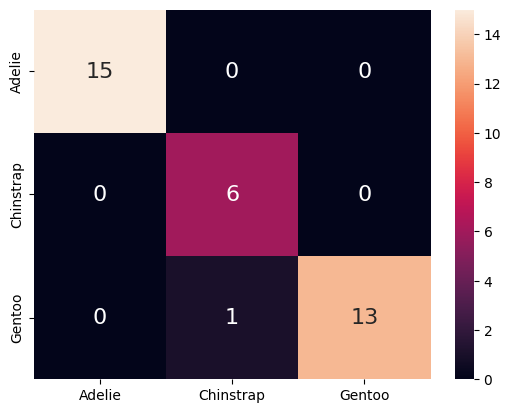

In [35]:
modelo_rf = RandomForestClassifier()

modelo_rf.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

nomes_das_features = modelo_rf.classes_
matriz_conf = confusion_matrix(
    y_verdadeiro, y_previsao, labels=nomes_das_features
)
df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)
sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Métricas.



In [36]:
print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       0.86      1.00      0.92         6
      Gentoo       1.00      0.93      0.96        14

    accuracy                           0.97        35
   macro avg       0.95      0.98      0.96        35
weighted avg       0.98      0.97      0.97        35



Probabilidade atribuída para cada previsão.



In [37]:
probabilidades = modelo_rf.predict_proba(X_teste)

for yp, yv, prob_ in zip(y_previsao, y_verdadeiro, probabilidades):
    indice = list(nomes_das_features).index(yp)
    print(f"Era {yv} e previu {yp}. Prob. de ser {yp}: {prob_[indice]:.3f}.")

Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 0.760.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.990.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 0.990.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 0.810.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.980.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.980.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 1.000.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.880.
Era Gentoo e previu Gentoo. Prob. de ser Gentoo: 1.000.
Era Chinstrap e previu Chinstrap. Prob. de ser Chinstrap: 0.990.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.510.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.890.
Era Adelie e previu Adelie. Prob. de ser Adelie: 0.990.
Era

## Validação cruzada estratificada



Observe a quantidade de cada espécie de pinguim que temos no nosso dataset.



In [38]:
DATASET_NAME = "penguins"
FEATURES = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]
TARGET = ["species"]

df = sns.load_dataset(DATASET_NAME)

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna()

df["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

Os dados que temos estão levemente desbalanceados, temos razoavelmente menos exemplos de pinguins de barbicha (chinstrap) do que os demais.

Dados desbalanceados podem influenciar a indução de modelos preditivos. Suponha que temos um conjunto de dados sobre uma doença rara, onde poucos exemplos são rotulados como tendo a doença. Observe que um modelo baseline irá performar muito bem nestes dados segundo diversas métricas que estudamos, mesmo chutando apenas que as pessoas não tem a doença sendo estudada. No entanto, isso claramente não é o que desejamos.

Dados desbalanceados podem atrapalhar o processo de validação cruzada pois a distribuição dos rótulos tem uma grande chance de ser diferente nos conjuntos de treino, teste e validação.

Uma estratégia para reduzir este problema é a validação cruzada estratificada. Nesta estratégia, os dados ainda são sorteados de maneira aleatória para compor os conjuntos de treito, teste e validação, no entanto são sorteados *por rótulo* e não simplesmente considerando o conjunto total de dados. Esta estratégia faz com que a distribuição dos rótulos seja similar nos conjuntos de treino, teste e validação.

Quando usamos as funções `GridSearchCV` e `RandomizedSearchCV` do `scikit-learn` com algoritmos classificadores, o próprio `scikit-learn` já usa a validação cruzada estratificada sem a necessidade de nenhuma configuração extra.

Vamos ver um exemplo com o `GridSearchCV`. Temos diversas métricas de classificação para escolher na [documentação](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values), aqui usaremos a métrica F1.



In [39]:
from sklearn.model_selection import GridSearchCV

NUM_FOLDS = 10

espaco_de_busca = {
    "max_depth": [None, 2, 3, 5, 7, 10],
    "min_samples_split": [1, 2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
}

modelo_dt_cv = DecisionTreeClassifier()

buscador = GridSearchCV(
    modelo_dt_cv,
    espaco_de_busca,
    cv=NUM_FOLDS,
    scoring="f1_weighted",
    refit=True,  # reajusta o melhor modelo com todos os dados de treino
    n_jobs=4,
)

buscador.fit(X_treino, y_treino)

resultados = pd.DataFrame(buscador.cv_results_)
resultados = resultados.reindex(
    ["mean_test_score", "std_test_score", "params"], axis=1
)
resultados

,mean_test_score,std_test_score,params
0,0.964250,0.030514,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
1,0.967385,0.028969,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
2,0.970675,0.030573,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
3,0.967385,0.028969,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
4,0.963820,0.030944,"{'max_depth': None, 'min_samples_leaf': 2, 'mi..."
...,...,...,...
91,0.964400,0.030410,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_..."
92,0.964008,0.027056,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
93,0.964008,0.027056,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
94,0.964008,0.027056,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."


Vamos ver o resultado.



In [40]:
print("A melhor métrica (considerando dados de treino) foi de ", buscador.best_score_)
print("O conjunto de hiperparâmetros que resultou nesta métrica foi ", buscador.best_params_)

A melhor métrica (considerando dados de treino) foi de  0.9707018787150978
O conjunto de hiperparâmetros que resultou nesta métrica foi  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


Vamos ver a matriz de confusão.



<Axes: >

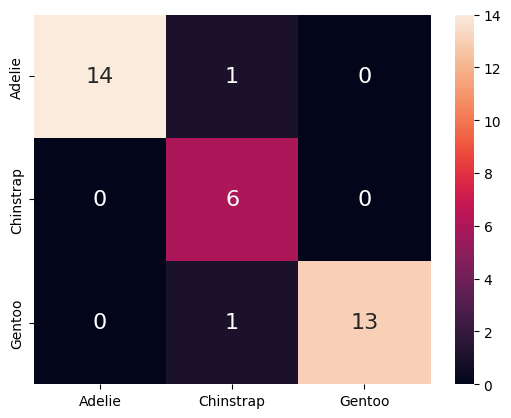

In [41]:
y_verdadeiro = y_teste
y_previsao = buscador.predict(X_teste)

nomes_das_features = buscador.classes_
matriz_conf = confusion_matrix(
    y_verdadeiro, y_previsao, labels=nomes_das_features
)
df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)
sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

Agora vamos estimar a performance deste modelo para dados que nunca viu!



In [42]:
y_verdadeiro = y_teste
y_previsao = buscador.predict(X_teste)

print(
    classification_report(
        y_verdadeiro, y_previsao, target_names=nomes_das_features
    )
)

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        15
   Chinstrap       0.75      1.00      0.86         6
      Gentoo       1.00      0.93      0.96        14

    accuracy                           0.94        35
   macro avg       0.92      0.95      0.93        35
weighted avg       0.96      0.94      0.95        35



## ROC-AUC



Uma estratégia de seleção de modelos de classificação é comparando a área da Curva ROC (Receiver Operating Characteristic, Característica de Operação do Receptor), métrica conhecida como ROC-AUC. Veja [este vídeo](https://www.youtube.com/watch?v=4jRBRDbJemM) do StatQuest sobre o assunto e busque outros materiais para se aprofundar.



## Referências



1.  IZBICKI, Rafael; DOS SANTOS, Tiago Mendonça. Aprendizado de máquina: uma abordagem estatística. 2020. Disponível em: [http://www.rizbicki.ufscar.br/ame/](http://www.rizbicki.ufscar.br/ame/).

2.  Matriz de Confusão na Wikipédia [https://en.wikipedia.org/wiki/Confusion_matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

3.  Regressão logística na Wikipédia [https://en.wikipedia.org/wiki/Logistic_regression](https://en.wikipedia.org/wiki/Logistic_regression)

4.  Vídeo do StatQuest sobre árvores de decisão para classificação [https://www.youtube.com/watch?v=_L39rN6gz7Y](https://www.youtube.com/watch?v=_L39rN6gz7Y)

5.  Visualizando a validação cruzada estratificada [https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html)

6.  Entropia no contexto de ciência da informação [https://en.wikipedia.org/wiki/Entropy_(information_theory)](https://en.wikipedia.org/wiki/Entropy_(information_theory))

7.  Classificação multiclasse e multitarget do `scikit-learn` [https://scikit-learn.org/stable/modules/multiclass.html](https://scikit-learn.org/stable/modules/multiclass.html)

